<a href="https://colab.research.google.com/github/technisekai/orbit-future-academy-km/blob/main/CV_1_Widi_Afandi_Visioner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Persiapan Data dan Library

In [ ]:
import tensorflow as tf
import keras
# library untuk preprocessing dan modeling
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.applications.inception_v3 import InceptionV3
# library untuk download dataset cifar
from tensorflow.keras import datasets
# library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

*download dataset*

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


*menampilkan data pada masing-masing kelas*

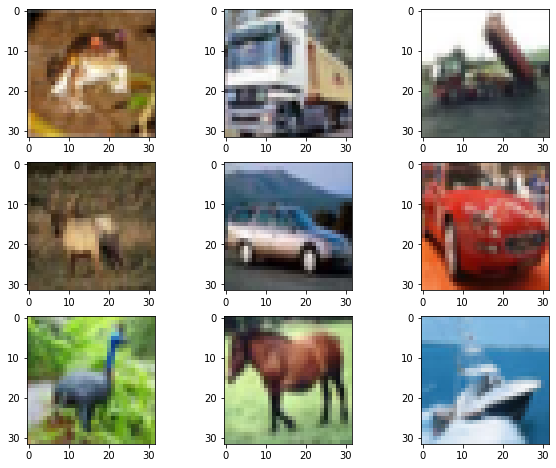

In [ ]:
# setting ukuran graph
plt.rcParams["figure.figsize"] = (10,8)
for i in range(9):
	# subplot
	plt.subplot(330 + 1 + i)
	# tampilkan data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# 2. Data Preprocessing

*Normalisasi data*

In [ ]:
#Normalize the pixel value to between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Modeling

*model dengan menggunakan 2 lapis layer convlotional dan maxpooling serta flatten serta hidden layer 32 perceptron dan output 10 kelas*

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input

In [ ]:
model = tf.keras.models.Sequential([
    # lapis 1                                
    tf.keras.layers.Conv2D(256, (3,3), padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # lapis 2
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # lapis 3
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 128)       295040    
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 5, 5, 32)          36896     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 2, 2, 32)       

*optimizer and loss function*

In [ ]:
optimizers =  tf.optimizers.Adam(learning_rate=3e-4)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizers,
              metrics=['accuracy'])

*callbacks*

In [ ]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      self.model.stop_training = True

callbacks = callback()

*training dengan data CIFAR-10*

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 32,
    validation_data = (test_images, test_labels),
    callbacks=[callbacks]
    )

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 11s 7ms/step - loss: 1.7793 - accuracy: 0.3387 - val_loss: 1.4357 - val_accuracy: 0.4747
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4713 - accuracy: 0.4641 - val_loss: 1.2986 - val_accuracy: 0.5430
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3557 - accuracy: 0.5100 - val_loss: 1.1733 - val_accuracy: 0.5829
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2782 - accuracy: 0.5411 - val_loss: 1.1071 - val_accuracy: 0.6098
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2155 - accuracy: 0.5669 - val_loss: 1.0407 - val_accuracy: 0.6294
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1740 - accuracy: 0.5819 - val_loss: 1.0537 - val_accuracy: 0.6327
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1267 - accuracy: 0.5980 - val_loss: 0.9785 - val_accurac

# 4. Evaluasi

*plot accuracy*

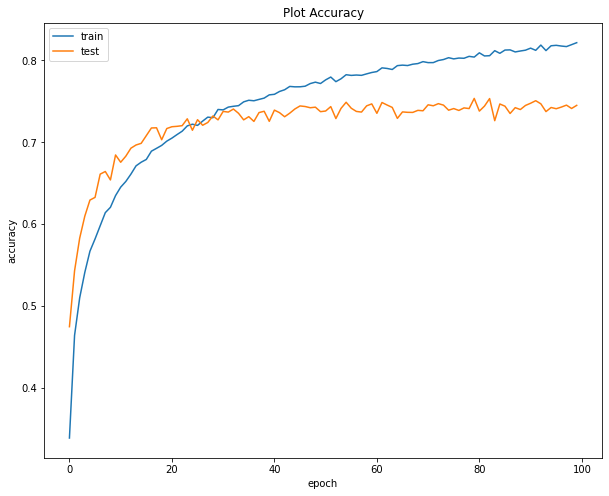

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], )
plt.plot(history.history['val_accuracy'])
plt.title('Plot Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*plot loss*

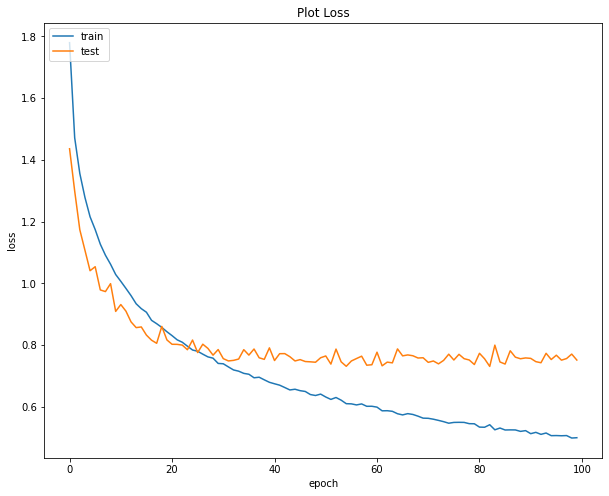

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()